# Lab 1 - Generalization part 2

In this lab session, we will examine the importance of generalization in the design of machine learning algorithms. Additionally, we will introduce Scikit-Learn (sklearn), a widely-used library that provides numerous pre-implemented machine learning algorithms.

Part 1: Specifically, we will go through a Machine Learning pipeline that usually involves:

1. Define the problem you want to solve  
2. Collect data  
3. Preprocess the data  
4. Define a set of candidate models  
5. Select the best model  
6. Estimate performance on unseen data  

Part 2: Resampling methods for model selection
1. Cross-Validation
2. Bootstrapping for model selection

### Material for the Lab:
1. Chapter 5 of the **"An Introduction to Statistical Learning"** book.

The book can be found [here](https://www.statlearning.com/).

**Note**: The first part of the notebook is identical to Lab 1.

# Import python libraries

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Load Dataset

![uci ml repo](./figures/UCI_repo.png)

The [**UCI machine learning repository**](https://archive.ics.uci.edu) is a valuable resource in the field of machine learning and data mining. It is maintained by the University of California, Irvine (UCI), and provides a vast collection of datasets that are frequently used for research, experimentation, and education in the machine learning community.


We will use the iris dataset, with our goal being to classify flowers into different categories based on certain features. 

You can find more information about the dataset on the following [webpage](https://archive.ics.uci.edu/dataset/53/iris)

In [63]:
features = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

target = 'Class'

### load some data with pandas

csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
dataset = pd.read_csv(csv_url, names=features + [target])
data_x = dataset[features]
data_y = dataset[[target]]

### lets have a quick look on our dataset
Our dataset consist of a set of different features together with a target category for classification

In [64]:
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


lets see different information on our dataset

In [65]:
print("Shape of our dataset:", dataset.shape)
print("Number of features:", data_x.shape[1])
print("Number of labels:", data_y.shape[1])
print("Number of examples:", data_x.shape[0])

Shape of our dataset: (150, 5)
Number of features: 4
Number of labels: 1
Number of examples: 150


In [66]:
print("Number of different classes", len(data_y["Class"].unique()))
print("unique classes:", data_y["Class"].unique())

Number of different classes 3
unique classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [67]:
data_y["Class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [68]:
data_x.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 640x480 with 0 Axes>

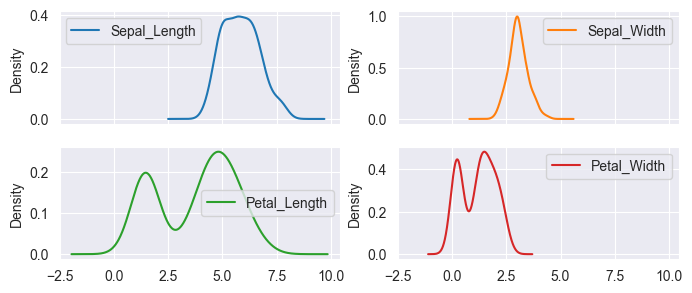

In [69]:
plt.figure()
dataset[features].plot.density(subplots=True,
                               layout=(7, 2),
                               figsize=(8, 12),
                               sharex=True,
                               sharey=False)
plt.show()
plt.close()

# Introduction to Scikit-Learn (Sklearn)

Scikit-Learn, is a powerful and widely-used machine learning library in Python. It provides a comprehensive set of tools for various machine learning tasks, making it an excellent choice for both beginners and experienced data scientists.

#### Key Features of Scikit-Learn

Sklearn offers a plethora of features and benefits, including:

- **User-Friendly Interface**: Sklearn provides a simple and consistent API that makes it easy to implement machine learning algorithms.
  
- **Wide Range of Algorithms**: It includes a diverse collection of machine learning algorithms, such as regression, classification, clustering, dimensionality reduction, and more.
  
- **Efficient Data Preprocessing**: Sklearn offers robust data preprocessing capabilities, including data cleaning, scaling, encoding, and feature selection.

- **Model Evaluation**: It provides tools for model evaluation, including various metrics for classification and regression tasks.

[Sklearn](https://scikit-learn.org/stable/supervised_learning.html) user guide.

# Data Preprocessing

In every machine learning pipeline, the data needs some preprocessing.

Scikit-Learn offers a range of [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) methods that allow us to modify data and address issues such as missing values, outlier removal, feature scaling, and data handling.

For example in some machine learning algorithms, the scales of the features can have a huge impact on the performance of the model.

In **data scaling**, we aim to bring all features to the same scale to ensure that no feature dominates others due to its range. This is especially important for algorithms that rely on distance metrics.

Consider the k-nearest neighbors (KNN) algorithm, where we calculate the Euclidean distance to find the k nearest neighbors. When features have varying scales, it can significantly affect the algorithm's performance. If we don't normalize our data and bring features to similar scales, the algorithm will put more weight to features with larger scales, potentially leading to biased outcomes. In our case, for example, our dataset contains features with different scales, such as "Sepal_Length" and "Petal_Width".

The most common method to scale your dataset are listed bellow.
1. min-max scaling
    * $x_{scaled} = (x - min) / (max-min)$
    * $x_{scaled} \in [0,1]$
    * not good technique when you have outliers
    
    
2. standard scaling
   * $x_{scaled} = (x - mean) / std$
   * $mean(x_{scaled}) = 0$
   * $std(x_{scaled}) = 1$
   * robust to outliers

In [70]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(data_x[features])

norm_x = standard_scaler.transform(data_x[features])
# sklearn return a numpy so we can convert back to pandas
norm_x = pd.DataFrame(norm_x, columns=features)

In [71]:
norm_x

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


<Figure size 640x480 with 0 Axes>

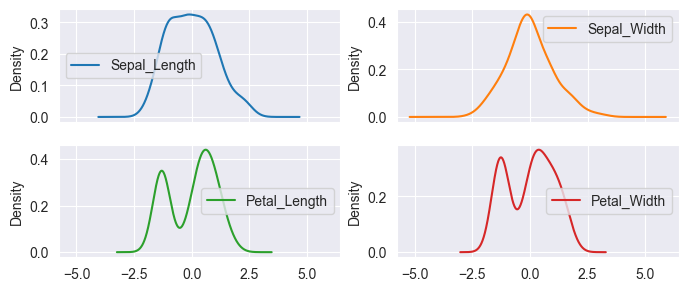

In [72]:
plt.figure()
norm_x[features].plot.density(subplots=True,
                              layout=(7, 2),
                              figsize=(8, 12),
                              sharex=True,
                              sharey=False)
plt.show()
plt.close()

In [73]:
norm_x[features].mean()

Sepal_Length   -4.736952e-16
Sepal_Width    -6.631732e-16
Petal_Length    3.315866e-16
Petal_Width    -2.842171e-16
dtype: float64

# Sklearn models API

Sklearn also offers a wide variety of [models](https://scikit-learn.org/stable/supervised_learning.html).

In [74]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)

In [75]:
# we can train our model using the fit method
model.fit(norm_x[features], data_y[target])

KNeighborsClassifier(n_neighbors=10)

In [76]:
# we can also make prediction on the dataset
model.predict(norm_x[features])

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [77]:
# we can get the predicted propabilities
model.predict_proba(norm_x[features])

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.7, 0.3

# Generalization

When developing a machine learning algorithm, the goal is not just to learn a model that good performance in our dataset. We want our model to be capable of generating accurate predictions for data it hasn't seen before. So we aim for our model to generalize well to upcoming data.

# Model Selection/Hyperparameter Tunning
In the process of model development, we often encounter **various candidate models** or different **hyperparameter** settings for our algorithms. For instance, in the k-nearest neighbors (KNN) algorithm, the choice of 'k' is a hyperparameter. Another hyperparameter is the distance metric used to calculate distances between data points. The collection of available candidates is typically referred to as the hypothesis space.

Therefore, when creating a model for a specific problem, our primary objective is typically to identify the model with the strongest generalization capabilities, the model that best explains future observations.

![Generalization](./figures/generalization.png)

![Generalization](./figures/development_set.png)

# Choosing model based on the train data.

To demonstrate the problem of both training and measuring the accuracy on single dataset.

Lets split our data in two different dataset.
1. **Development set**: the that we can use in order to produce our final model.
2. **Testing set**: that we can use estimate the performance of our data in unseen data.

We assume that during the training we don't have any access to the Testing set, so we can use it to select the best model.

In [78]:
from sklearn.model_selection import train_test_split

# Split our data into training and test set.
X_develop, X_test, y_develop, y_test = train_test_split(norm_x, data_y, test_size=0.2, 
                                                        random_state=4)

In [79]:
print("Development set size :", X_develop.shape[0]/norm_x.shape[0], "%" )
print("Test set size :", X_test.shape[0]/norm_x.shape[0], "%")

Development set size : 0.8 %
Test set size : 0.2 %


In [80]:
from sklearn.neighbors import KNeighborsClassifier

# train our model using the development set.
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_develop, y_develop[target])

KNeighborsClassifier(n_neighbors=1)

## Check the accuracy on train set

In [81]:
from sklearn.metrics import accuracy_score

# make prediction on the development set
prediction_train = model.predict(X_develop)

# measure the performance of the development set
train_score = accuracy_score(y_true=y_develop[target],
                             y_pred=prediction_train)
print(f"Accuracy Score: {train_score * 100}%")

Accuracy Score: 100.0%


## Check the accuracy on Test set

In [82]:
# make prediction on the Test set
prediction_test = model.predict(X_test)

# measure the Accuracy on the Test set
train_score = accuracy_score(y_true=y_test[target],
                             y_pred=prediction_test)

print(f"Accuracy Score: {train_score * 100}%")

Accuracy Score: 90.0%


We can observe that our model has different accuracy compared to the training and test sets.  
So there might be a better setting for k that could lead to better generalization.

# Training / Validation / Testing Dataset
![Cross-Validation](./figures/train_val_test.png)

A common approach for model selection is to split the dataset into three distinct parts:

1. The *training* set: used to train different models in the hypothesis space.
2. The *validation* set: used to evaluate the performance of each model and choose the best one.
3. The *testing* set: used to measure the performance of the final model.

The process for each model and set of hyperparameters is as follows:
1. Train the model using the training set.
2. Estimate the model’s performance on the validation set.
3. Select the model that performs best on the validation set.
4. Obtain an unbiased estimate of the selected model’s performance using the testing set.

In [83]:
# define different hyperparameters
different_k_settings = list(range(1, 70, 10))

In [84]:
different_k_settings

[1, 11, 21, 31, 41, 51, 61]

### Implemention

No we will implement the model selection method.

#### Step A.
Create the training (80%) and validation (20%) set by spliting the development set in two parts.

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X_develop, y_develop, test_size=0.2, random_state=4)

#### Step B.  

For every hypeparamter k we can:  
    1. Train the model using the training set  
    2. Get the performance of the model in terms Accuracy on the Train set.  
    3. Get the performance of the model in terms Accuracy on the Validation set.  
    4. Get the performance of the model in terms Accuracy on the Test set.  
    5. Store all results

In [86]:
train_accuracy = {}
val_accuracy = {}
test_accuracy = {}
for k in different_k_settings:
    # define the model
    model = KNeighborsClassifier(n_neighbors=k)

    # train the model on Train set
    model.fit(X_train, y_train[target])

    # get the perfomance on the different set for comparison
    #1.Accuracy on Train set
    y_pred_train = model.predict(X_train)
    train_acc = accuracy_score(y_true=y_train[target], y_pred= y_pred_train)
    train_accuracy[k] = train_acc
    
    #2.Accuracy on Train set
    y_pred_val = model.predict(X_val)
    val_acc = accuracy_score(y_true=y_val[target], y_pred= y_pred_val)
    val_accuracy[k] = val_acc

    #3.Accuracy on Train set
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_true=y_test[target], y_pred= y_pred_test)
    test_accuracy[k] = test_acc

#### Step C. 
Plot the performance for each hyperparameter `k` measured on the different datasets to visualize the differences. 

More specifically, we can create a plot where the x-axis represents the different hyperparameter settings, and the y-axis measures performance. Each dataset’s performance can be represented by a separate line.


What you observe?

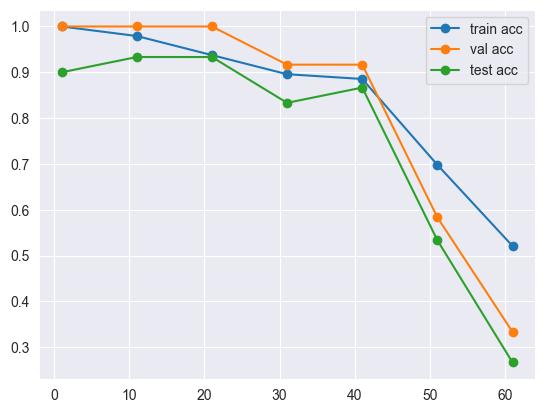

In [87]:
plt.figure()
plt.plot(train_accuracy.keys(), train_accuracy.values(), marker="o", label = "train acc")
plt.plot(val_accuracy.keys(), val_accuracy.values(), marker="o", label = "val acc")
plt.plot(test_accuracy.keys(), test_accuracy.values(), marker="o", label = "test acc")
plt.legend()

#### Step D. 
Select the model with the best Accuracy according to the Validation Set.

In [88]:
index = np.argmax(list(val_accuracy.values()))

In [89]:
best_k = list(val_accuracy.keys())[index]

In [90]:
best_k

1

Here, we observe that we end up with several candidates for the best model. Sometimes, when we have a limited amount of data in the validation set, the curves may not resemble those of the test set. We will explore more reliable methods that are typically used in practice.

For the selection of the \(k\) parameter, we need to make an arbitrary choice. A common mistake is selecting the hyperparameter based on the test set, which is typically referred to as overfitting to the test data.

## Resampling methods for model selection

In practice partitioning the dataset into 3 different dataset requires a lot of records.  
When our dataset has limited amount of points a good alternative is to use resampling methods for model selection.

Note that this method requires at least a development and test set.
Then we will apply Resampling techniques to select models using only development set.  
After select the best model we will again use the test set to have an unbiased estimate about the model performance.

The most common techniques are:

1. **Cross validation** (most popular)
2. **Bootstrapping**

In practice, there are no guarantees as to which method works better.

## A. Cross-Validation

One of the most widely used techniques for model evaluation is **k-fold cross-validation**.

In k-fold cross-validation, the training set is divided into **k** subsets, or "folds," as illustrated below:

![Cross-Validation](./figures/cv.png)


The model is then trained **k** times, following this procedure:

1. For each of the **k** iterations:
   - Train the model using **k-1** folds.
   - Evaluate the model on the remaining held-out fold.

2. **Aggregate** the performance metrics across the **k** evaluation sets.

3. Select the model configuration with the best average performance.

4. Train it using the whole development set.

5. Finally, estimate the model's performance using the test set, which was not involved in cross-validation.

K-fold cross-validation is an effective method for estimating model performance and guiding model selection.  
By using multiple subsets of the training data, it provides a more reliable estimate of how well the model generalizes to unseen data.

### Step 1
We will create a function to get the k different Folds

In [91]:
def get_folds(data_x, data_y, n_folds):
    indexies = list(data_x.index)
    np.random.shuffle(indexies)
    num_samples_per_fold = data_x.shape[0]//n_folds 
    folds = []
    for n in range(n_folds):
        start = n * num_samples_per_fold
        end = (n +1)* num_samples_per_fold
        fold_index = indexies[start:end]
    
        fold_x = data_x.loc[fold_index]
        fold_y = data_y.loc[fold_index]
        folds += [ (fold_x,fold_y)]
    return folds

### Step 2. 
For each model we will get the average cs-score and then we will select the best model

In [92]:
def get_cv_acc(data_x, data_y, n_folds, model):
    folds = get_folds(data_x=data_x, data_y=data_y, n_folds=n_folds)
    val_acc = []
    for n in range(n_folds):
        tmp_model = model
    
        # val set
        x_val_xv = folds[n][0]
        y_val_xv = folds[n][1]
        # train set
        train_indexies = set(range(n_folds)).difference(set([n]))
        x_train_xv = pd.concat([folds[ind_x][0] for ind_x in train_indexies])
        y_train_xv = pd.concat([folds[ind_x][1] for ind_x in train_indexies])
    
        # train model
        tmp_model.fit(x_train_xv[features], y_train_xv[target])
    
        # get validation loss
        y_pred_val_cv = model.predict(x_val_xv[features])
        val_acc_fold = accuracy_score(y_true=y_val_xv[target],
                                      y_pred= y_pred_val_cv)
        val_acc += [val_acc_fold]
    avg_acc = np.mean(val_acc)
    return avg_acc, val_acc

In [93]:
cv_acc = {}
for h_parameter in different_k_settings:
    model = KNeighborsClassifier(n_neighbors=h_parameter)
    avg_acc, fold_acc = get_cv_acc(data_x=X_develop,
                                   data_y=y_develop,
                                   n_folds=10,
                                   model=model)
    cv_acc[h_parameter] = avg_acc

In [94]:
cv_acc

{1: 0.9583333333333333,
 11: 0.9666666666666666,
 21: 0.9166666666666666,
 31: 0.875,
 41: 0.8833333333333332,
 51: 0.8833333333333334,
 61: 0.725}

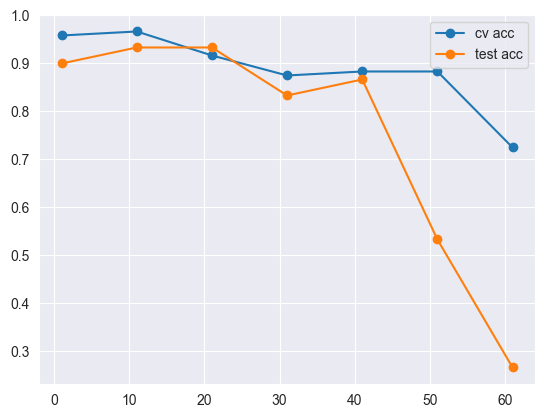

In [95]:
plt.figure()
plt.plot(cv_acc.keys(), cv_acc.values(), marker="o", label = "cv acc")
plt.plot(test_accuracy.keys(), test_accuracy.values(), marker="o", label = "test acc")
plt.legend()

## B. Bootstrapping for Model Selection

Bootstrapping is an effective method for model selection, especially when dealing with a limited amount of data. In general, bootstrapping is a technique that involves sampling with replacement to estimate a quantity. It can be applied for various purposes beyond model selection. In our case, our objective is to estimate the test error of various models and, finally, choose the best model.

Instead of using k distinct folds as in cross-validation, the bootstrap method generates training and validation sets by sampling from the dataset. Specifically, we sample with replacement to obtain *n* different data points, where "n" represents the original size of the dataset. Since we sample with replacement, our training set may contain duplicate points. The remaining dataset, which is not included in the training set, becomes the validation set, allowing us to calculate the error of our model. This process is repeated multiple times, and the results of validation errors are averaged to provide an estimate of our model's performance with the current hyperparameters.

To perform hyperparameter tuning using the bootstrap method, we can repeat the same procedure for each hyperparameter setting and select the setting with the lowest average bootstrap error.

![Bootstrap Model Selection](./figures/bootstrap.png)

**Algorithm:**

1. Sample *n* data points with replacement to create a training set (the bootstrap sample). 
   - This results in *n* different data points.
   - On average, bootstraps include 66% unique records, as some may be duplicates.
2. Use the remaining data points for the validation set.
    - This leaves 34% of the data for validation.
        
3. Train the model on the training set.

4. Evaluate the model on the validation set.

5. Repeat the process *B* times and calculate the average validation error scores.

6. Repeat the above steps for every hyperparameter setting.

7. Select the setting with the best performance.

# Assignment 2 - Bootstrap for Model Selection

In this assignment, you are asked to determine the best hyperparameter for the k-nearest neighbors (KNN) algorithm using the bootstrap method for model selection as described above.

**Assignment Steps:**

1. Create a function that generates B different bootstrap samples (datasets) for both the training and validation sets, as described above.

2. Calculate the average validation loss for each different K setting (hyperparameter for KNN).

3. Select the model with the best average validation loss.

4. Create your final model by training the selected model with the best hyperparameter setting using the entire development dataset.

5. Calculate the test error for your final model.


#### hints

In [96]:
# the following go sample a N points with replacement
X_develop.sample(frac = 1.0 , replace= True)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
74,0.674501,-0.356361,0.307833,0.133226
108,1.038005,-1.281972,1.160819,0.790591
108,1.038005,-1.281972,1.160819,0.790591
37,-1.143017,0.106445,-1.284407,-1.444450
110,0.795669,0.337848,0.762759,1.053537
...,...,...,...,...
9,-1.143017,0.106445,-1.284407,-1.444450
104,0.795669,-0.124958,1.160819,1.316483
56,0.553333,0.569251,0.535296,0.527645
15,-0.173674,3.114684,-1.284407,-1.050031


In [97]:
# some points are duplicates
X_develop.sample(frac = 1.0 , replace= True).index.duplicated()

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False,  True,  True, False,  True,
        True, False, False,  True, False,  True, False, False,  True,
       False, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False,  True, False,  True, False,
       False,  True, False,  True,  True,  True,  True, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True, False, False, False,
       False,  True,  True, False,  True,  True, False, False, False,
       False,  True, False])

In [98]:
# you can use also the following code to exclude some points with the specific index
new_indexies = X_develop.index.difference([84,47,108],sort=False)
X_develop.loc[new_indexies]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
1,-1.143017,-0.124958,-1.341272,-1.312977
93,-1.021849,-1.744778,-0.260824,-0.261193
144,1.038005,0.569251,1.103953,1.710902
125,1.643844,0.337848,1.274550,0.790591
92,-0.052506,-1.050569,0.137236,0.001753
...,...,...,...,...
50,1.401508,0.337848,0.535296,0.264699
87,0.553333,-1.744778,0.364699,0.133226
104,0.795669,-0.124958,1.160819,1.316483
129,1.643844,-0.124958,1.160819,0.527645


In [99]:
X_develop

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
84,-0.537178,-0.124958,0.421564,0.396172
47,-1.506521,0.337848,-1.341272,-1.312977
108,1.038005,-1.281972,1.160819,0.790591
1,-1.143017,-0.124958,-1.341272,-1.312977
93,-1.021849,-1.744778,-0.260824,-0.261193
...,...,...,...,...
50,1.401508,0.337848,0.535296,0.264699
87,0.553333,-1.744778,0.364699,0.133226
104,0.795669,-0.124958,1.160819,1.316483
129,1.643844,-0.124958,1.160819,0.527645


#### step 1
1. Create a function that generates B different bootstrap samples (datasets) for both the training and validation sets, as described above.


In [100]:
def get_bootstrap_train_val(data_x, data_y, B):
    dataset_list = [ ]
    for b in range(B):
        bootstrap_sample_x = data_x.sample(frac = 1.0 , replace= True)  # train set
        bootstrap_sample_y  = data_y.loc[bootstrap_sample_x.index] # labels
        bootstrap_index = bootstrap_sample_x.index

        val_index = data_x.index.difference(bootstrap_index)
        hold_out_data_x =  data_x.loc[val_index]# validation set
        hold_out_data_y =  data_y.loc[val_index]
        dataset = ((bootstrap_sample_x,bootstrap_sample_y),(hold_out_data_x,hold_out_data_y))
        dataset_list.append(dataset)
    return dataset_list

We can also check the size of the validation sets:

In [101]:
different_datasets = get_bootstrap_train_val(X_develop,y_develop,B=200)

sizes_val = []
for bootstrap_dataset in different_datasets:
    (train_set_x,train_set_y),(val_set_x,val_set_y) = bootstrap_dataset
    percentage = val_set_x.shape[0]/X_develop.shape[0]
    sizes_val.append(percentage)
    print(f"{percentage*100:.1f}%")

38.3%
36.7%
37.5%
36.7%
35.8%
34.2%
38.3%
39.2%
40.8%
35.0%
44.2%
38.3%
35.0%
35.8%
38.3%
34.2%
36.7%
41.7%
36.7%
36.7%
37.5%
43.3%
36.7%
35.0%
38.3%
34.2%
39.2%
35.8%
34.2%
34.2%
34.2%
37.5%
32.5%
38.3%
30.8%
40.0%
36.7%
36.7%
35.0%
33.3%
39.2%
30.0%
33.3%
35.0%
31.7%
36.7%
35.8%
42.5%
39.2%
40.0%
35.8%
35.8%
37.5%
36.7%
35.0%
32.5%
33.3%
38.3%
35.8%
35.0%
32.5%
37.5%
40.0%
40.8%
40.0%
36.7%
34.2%
35.8%
33.3%
39.2%
38.3%
38.3%
39.2%
33.3%
43.3%
35.0%
36.7%
38.3%
31.7%
35.8%
35.0%
34.2%
38.3%
40.0%
37.5%
39.2%
35.0%
35.8%
35.8%
38.3%
37.5%
35.0%
40.0%
36.7%
37.5%
35.8%
36.7%
39.2%
35.0%
36.7%
31.7%
40.0%
45.0%
36.7%
32.5%
38.3%
35.8%
36.7%
33.3%
36.7%
35.0%
33.3%
32.5%
34.2%
36.7%
35.8%
35.0%
36.7%
37.5%
38.3%
40.0%
33.3%
36.7%
37.5%
37.5%
35.0%
37.5%
35.0%
38.3%
38.3%
32.5%
35.0%
37.5%
36.7%
40.0%
37.5%
35.8%
34.2%
35.8%
34.2%
31.7%
38.3%
35.8%
33.3%
36.7%
37.5%
36.7%
35.0%
30.8%
41.7%
41.7%
34.2%
34.2%
34.2%
35.8%
39.2%
39.2%
35.8%
33.3%
38.3%
38.3%
36.7%
40.8%
30.8%
36.7%
38.3%
35.8

In [102]:
np.mean(sizes_val)*100

36.72083333333334

#### step 2
2. Calculate the average validation loss for each different K setting (hyperparameter for KNN).


In [108]:
different_datasets = get_bootstrap_train_val(X_develop,y_develop,B=10)

k_results = {}
for k in different_k_settings:
    val_accuracy_list = []
    # average val error across the dataset
    for dataset in different_datasets:
        (train_x,train_y),(val_x, val_y) = dataset
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(train_x, train_y[target])

        # get the prediction of the model on validation set
        prediction_val = model.predict(val_x)
        val_accuracy = accuracy_score(y_true=val_y[target],
                                      y_pred=prediction_val)
        val_accuracy_list.append(val_accuracy)
    k_results[k] = np.mean(val_accuracy_list)

#### step 3
3. Select the model with the best average validation loss.


In [109]:
k_results

{1: 0.928928285824419,
 11: 0.9342146776721668,
 21: 0.8923036819248276,
 31: 0.870175549479652,
 41: 0.8439607541700204,
 51: 0.8186316967465368,
 61: 0.7628826750203301}

In [110]:
best_k = 11

#### step 4
4. Create your final model by training the selected model with the best hyperparameter setting using the entire development dataset.


In [111]:
final_model = KNeighborsClassifier(n_neighbors=11)
final_model.fit(X_develop, y_develop[target])

KNeighborsClassifier(n_neighbors=11)

#### step 5
5. Calculate the test error for your final model.


In [112]:
prediction_test = final_model.predict(X_test)
final_test_accuracy = accuracy_score(y_true=y_test[target],
                                     y_pred=prediction_test)
final_test_accuracy

0.9333333333333333

#### Step 6  
Train a **Perceptron** algorithm using scikit-learn (without tuning hyperparameters) and evaluate it on the test set:  
[scikit-learn Perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)  


In [113]:
from sklearn.linear_model import Perceptron
perc_model = Perceptron()
perc_model.fit(X_develop, y_develop[target])


prediction_test = perc_model.predict(X_test)
perc_model_accuracy = accuracy_score(y_true=y_test[target],
                                     y_pred=prediction_test)
perc_model_accuracy

0.9666666666666667